# Las librerías gráficas

## Cargar el conjunto de datos `usu_individual_t117.txt` de la Encuesta Permanente de Hogares del 1er trimestre 2017

In [100]:
install.packages('ggthemes')
install.packages('ggrepel')

library(tidyverse)
library(ggthemes)
library(ggrepel)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [104]:
usu <- read.table(file = 'usu_individual_t117.csv', sep = ';', header = TRUE)
head(usu)

,CODUSU,ANO4,TRIMESTRE,NRO_HOGAR,COMPONENTE,H15,REGION,MAS_500,AGLOMERADO,PONDERA,⋯,PDECIFR,ADECIFR,IPCF,DECCFR,IDECCFR,RDECCFR,GDECCFR,PDECCFR,ADECCFR,PONDIH
,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<chr>,<int>,<int>,⋯,<int>,<int>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,TQRMNOQURHKOMLCDEFIAH00469284,2017,1,1,4,1,43,S,2,861,⋯,NA,NA,0,NA,NA,NA,NA,NA,NA,0
2,TQRMNOQURHKOMLCDEFIAH00469284,2017,1,1,5,1,43,S,2,861,⋯,NA,NA,0,NA,NA,NA,NA,NA,NA,0
3,TQRMNOQURHKOMLCDEFIAH00469284,2017,1,1,6,1,43,S,2,861,⋯,NA,NA,0,NA,NA,NA,NA,NA,NA,0
4,TQRMNOQURHKOMLCDEFIAH00469284,2017,1,1,7,1,43,S,2,861,⋯,NA,NA,0,NA,NA,NA,NA,NA,NA,0
5,TQRMNOQURHKOMLCDEFIAH00469284,2017,1,1,8,0,43,S,2,861,⋯,NA,NA,0,NA,NA,NA,NA,NA,NA,0
6,TQRMNOQURHKOMLCDEFIAH00469284,2017,1,1,9,0,43,S,2,861,⋯,NA,NA,0,NA,NA,NA,NA,NA,NA,0


## Calcular el promedio del ingreso por ocupación principal (Variable **P21**)  para  **asalariados** (Variable **CAT_OCUP**) con y sin **descuento jubilatorio** (Variable **PP07H**, 0: no aplica, 1: con descuento, 2: sin descuento)

In [106]:
p21_per_discount <- usu %>%
    select(PP07H, P21, CAT_OCUP) %>%
    filter(PP07H != -1) %>%
    group_by(PP07H) %>%
    summarise(avg_p21 = mean(P21))

p21_per_discount

PP07H,avg_p21
<int>,<dbl>
0,6686.585
1,12425.779
2,4992.458


## Filtrar los ingresos mayores a 0 (**P21>0**)

In [107]:
usu <- filter(usu, P21 > 0)
head(pos_income)

,CODUSU,ANO4,TRIMESTRE,NRO_HOGAR,COMPONENTE,H15,REGION,MAS_500,AGLOMERADO,PONDERA,⋯,PDECIFR,ADECIFR,IPCF,DECCFR,IDECCFR,RDECCFR,GDECCFR,PDECCFR,ADECCFR,PONDIH
,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<chr>,<int>,<int>,⋯,<int>,<int>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,TQRMNOQURHKOMLCDEFIAH00469284,2017,1,1,13,1,43,S,2,861,⋯,NA,NA,0,NA,NA,NA,NA,NA,NA,0
2,TQRMNORWSHLMLOCDEFIAH00497956,2017,1,1,1,1,43,S,2,514,⋯,NA,2,9500,7,7,7,7,NA,8,1196
3,TQRMNORRUHJLKUCDEFIAH00498010,2017,1,1,1,1,43,S,2,888,⋯,NA,NA,0,NA,NA,NA,NA,NA,NA,0
4,TQRMNORRUHJLKUCDEFIAH00498010,2017,1,1,2,1,43,S,2,888,⋯,NA,NA,0,NA,NA,NA,NA,NA,NA,0
5,TQRMNOQUSHJOMMCDEFIAH00498029,2017,1,1,1,1,43,S,2,794,⋯,NA,1,2000,1,1,1,1,NA,1,1578
6,TQRMNOQQWHLLKTCDEFIAH00497900,2017,1,1,1,1,43,S,2,1141,⋯,NA,7,21000,10,10,10,10,NA,10,2137


## realizar un gráfico de barras donde se compare **P21** para ambos valores de **PP07H**

In [108]:
p21_per_discount <- p21_per_discount %>%
    mutate(discount_type = case_when(
        PP07H == 0 ~ 'No aplica',
        PP07H == 1 ~ 'Con descuento',
        PP07H == 2 ~ 'Sin descuento'
    ))
head(p21_per_discount)

PP07H,avg_p21,discount_type
<int>,<dbl>,<chr>
0,6686.585,No aplica
1,12425.779,Con descuento
2,4992.458,Sin descuento


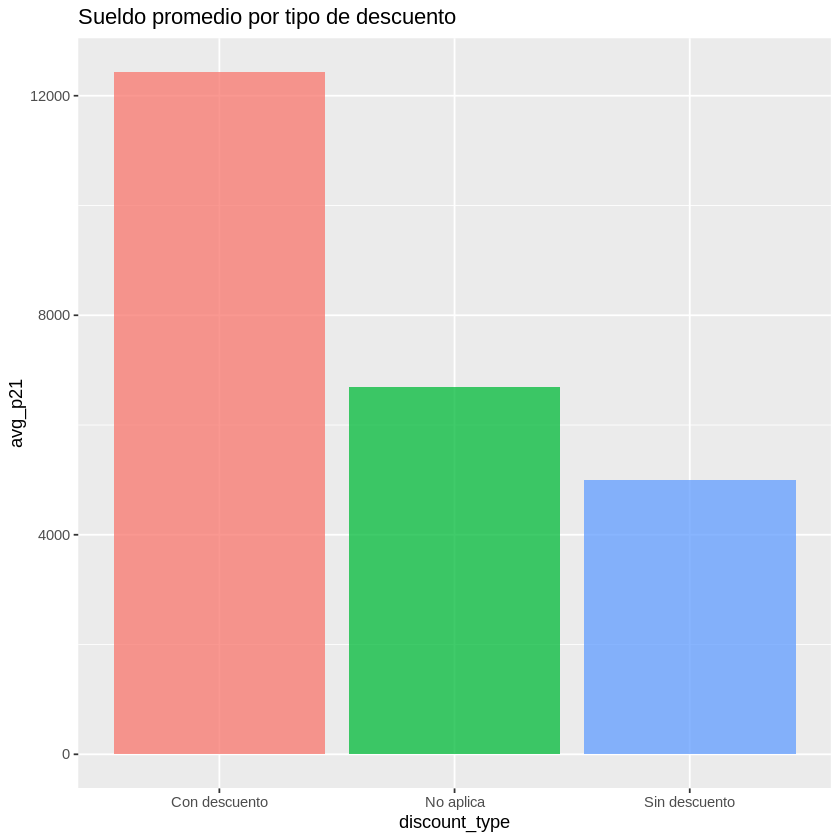

In [109]:
ggplot(
    data = p21_per_discount,
    aes(x = discount_type, avg_p21, fill = discount_type)
) +
    geom_col(alpha=0.75) +
    labs(title = "Sueldo promedio por tipo de descuento") +
    theme(legend.position = 'none')

## Representar la distribución del ingreso por ocupación principal (Variable **P21**)  para Asalariados, Cuentapropistas y Patrones (Variable **CAT_OCUP**), con el tipo de gráfico Kernel

In [110]:
income_per_ocup <- usu %>%
    select(CAT_OCUP, P21) %>%
    mutate(GROUP = case_when(
        CAT_OCUP == 3 ~ 'Asalariados',
        CAT_OCUP == 2 ~ 'Cuentapropistas',
        CAT_OCUP == 1 ~ 'Patrones'
    ))

head(income_per_ocup)

,CAT_OCUP,P21,GROUP
,<int>,<int>,<chr>
1,3,1500,Asalariados
2,3,9500,Asalariados
3,3,7000,Asalariados
4,3,8000,Asalariados
5,2,6000,Cuentapropistas
6,3,14000,Asalariados


Warning message:
“Removed 47 rows containing non-finite values (`stat_density()`).”


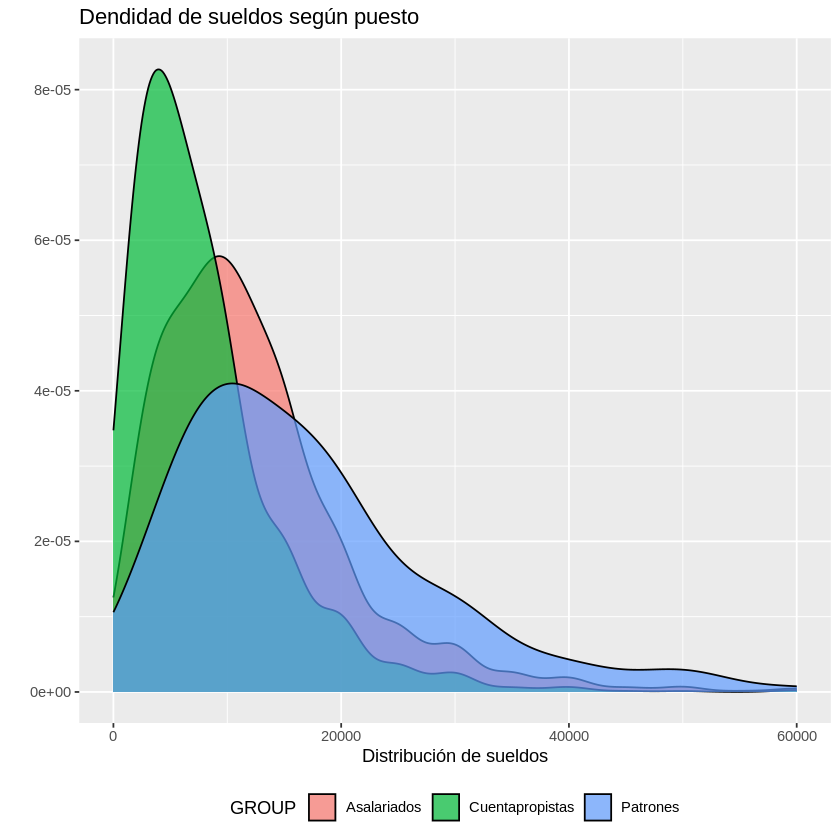

In [111]:
ggplot(
    income_per_ocup,
    aes(x = P21, group = GROUP, fill = GROUP)
) + geom_density(
    alpha = 0.7,
    adjust = 2
) + scale_x_continuous(
    limits = c(0, 60000)
) + labs(
    x = 'Distribución de sueldos',
    y = '',
    title = 'Dendidad de sueldos según puesto'
) + theme(
    legend.position = 'bottom'
)

## (OPCIONAL) Hacer un gráfico boxplot de la distribución de edades de los asalariados con descuento jubilatorio, y de los asalariados sin descuento jubilatorio.

In [112]:
age_distribution <- usu %>%
    filter(PP07H != 0 & CAT_OCUP == 3) %>%
    select(PP07H, CH06, CAT_OCUP) %>%
    mutate(GROUP = case_when(
        PP07H == 1 ~ 'Con descuento',
        PP07H == 2 ~ 'Sin descuento'
    ))

head(age_distribution)

,PP07H,CH06,CAT_OCUP,GROUP
,<int>,<int>,<int>,<chr>
1,2,20,3,Sin descuento
2,1,64,3,Con descuento
3,1,30,3,Con descuento
4,1,24,3,Con descuento
5,2,59,3,Sin descuento
6,1,41,3,Con descuento


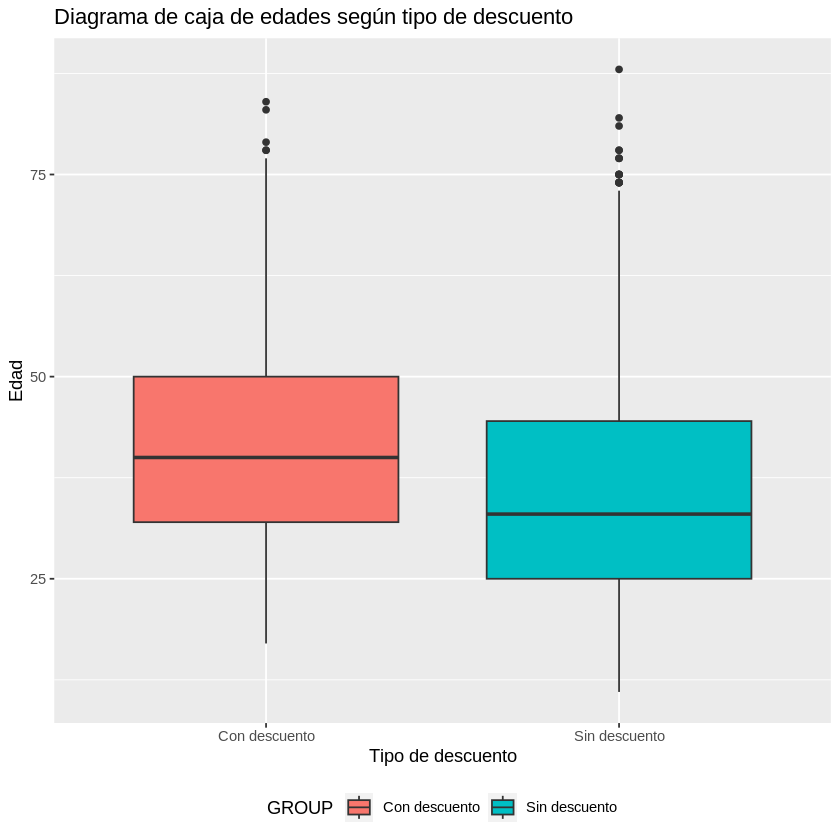

In [113]:
ggplot(
    age_distribution,
    aes(
        x = GROUP,
        y = CH06,
        fill = GROUP
    )
)
    + geom_boxplot()
    + labs(
            title = 'Diagrama de caja de edades según tipo de descuento',
            x = 'Tipo de descuento',
            y = 'Edad'
    )
    + theme(
        legend.position = 'bottom'
    )

## (OPCIONAL) Calcular el procentaje de asalariados sin descuento jubilatorio como $\frac{Asal. s/ desc jubil}{Asal. c/ desc jubil+ Asal.s/ desc jubil}$. Luego realizar un gráfico de linea con la evolución de este indicador

In [136]:
discount_evolution <- usu %>%
    filter(CAT_OCUP == 3 | PP07H != 0) %>%
    group_by(CH06) %>%
    summarise(percento = (sum(PP07H == 2) / (sum(PP07H == 2) + sum(PP07H == 1))) * 100)
head(discount_evolution)

CH06,percento
<int>,<dbl>
11,100.00000
15,100.00000
16,100.00000
17,91.17647
18,85.00000
19,72.67081


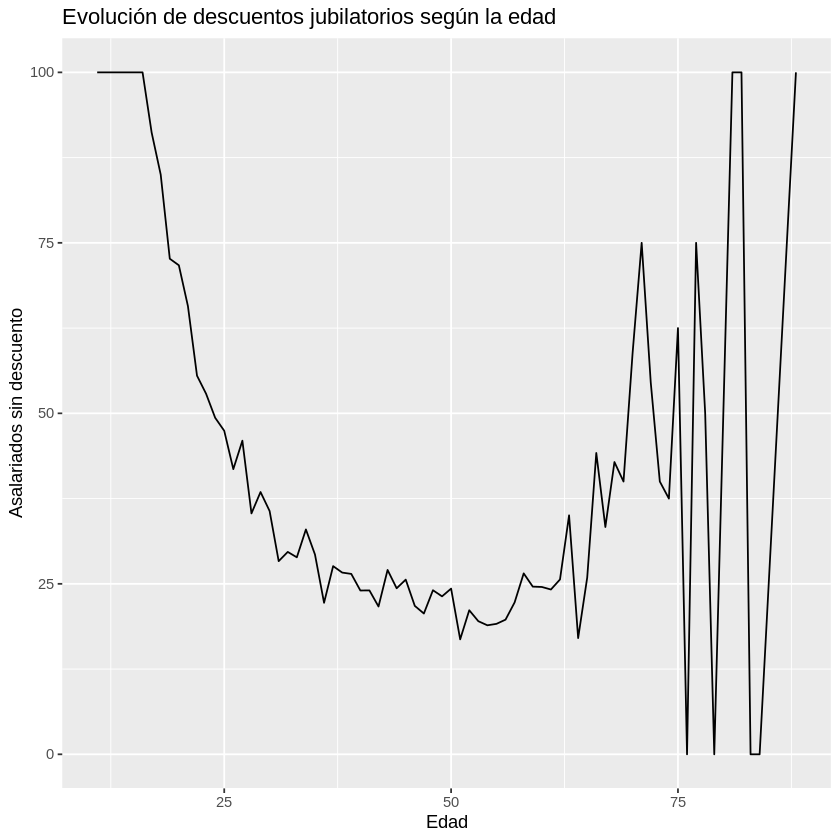

In [137]:
ggplot(
    discount_evolution,
    aes(
        x = CH06,
        y = percento,
        fill = CH06
    )
) + geom_line() +
    labs(
        x = 'Edad',
        y = 'Asalariados sin descuento',
        title = 'Evolución de descuentos jubilatorios según la edad'
    )